In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

In [142]:
FILE_PATH = 'Dataset/Covid.csv'

In [143]:
df=pd.read_csv(FILE_PATH, index_col=0, header=0)
df = df.apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',', ''), errors='coerce'))
df = df.dropna(axis=1, how='all')
df = df.dropna(axis=0)
df.head()

,Total Cases,Total Deaths,Total Recovered,Active Cases,"Serious, Critical",Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population
#,,,,,,,,,,
1,98166904,1084282.0,94962112.0,2120510.0,2970.0,293206.0,3239.0,1.118159e+09,3339729.0,3.348053e+08
2,44587307,528629.0,44019095.0,39583.0,698.0,31698.0,376.0,8.944169e+08,635857.0,1.406632e+09
3,35342950,155078.0,34527115.0,660757.0,869.0,538892.0,2365.0,2.714902e+08,4139547.0,6.558452e+07
4,34706757,686027.0,33838636.0,182094.0,8318.0,161162.0,3186.0,6.377617e+07,296146.0,2.153536e+08
5,33312373,149948.0,32315200.0,847225.0,1406.0,397126.0,1788.0,1.223324e+08,1458359.0,8.388360e+07


In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example box plot for a specific column (replace 'Total Deaths' with your column name)



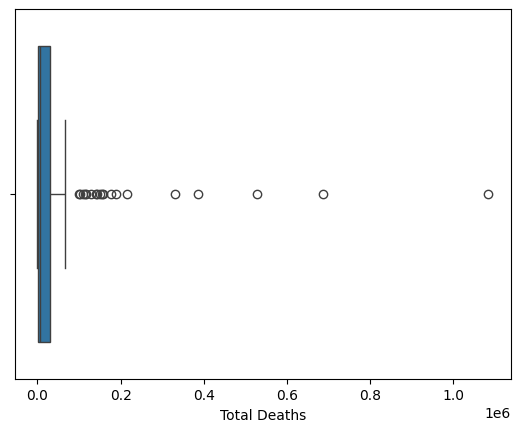

In [145]:
sns.boxplot(x=df['Total Deaths'])
plt.show()

<Axes: xlabel='Total Deaths', ylabel='Total Cases'>

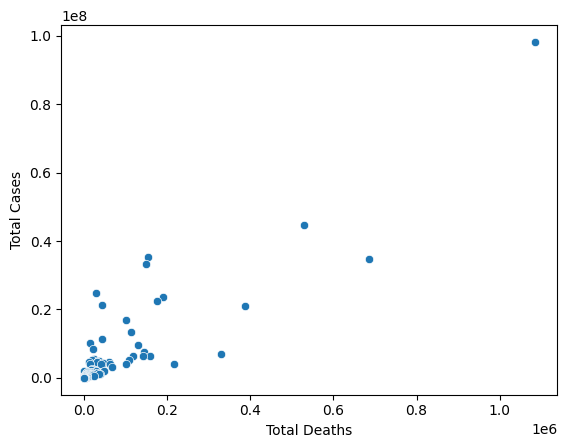

In [146]:
sns.scatterplot(x=df['Total Deaths'], y=df['Total Cases'])

In [147]:
# # Calculate IQR for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Remove rows with outliers based on IQR
df  = df[~((df < (Q1 - IQR)) | (df > (Q3 + IQR))).any(axis=1)]


<Axes: >

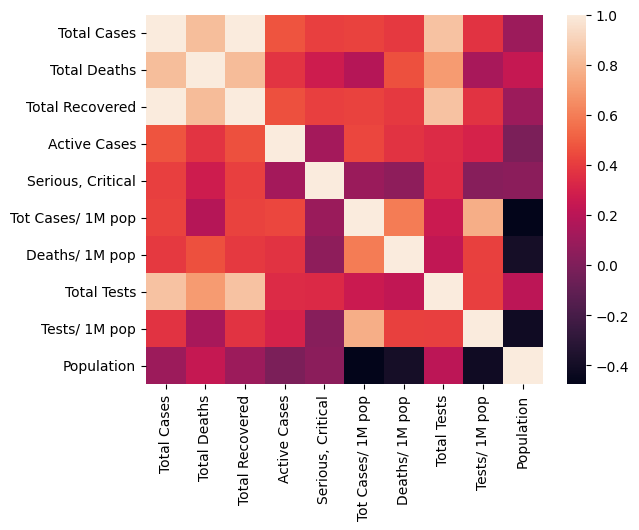

In [148]:
sns.heatmap(df.corr())

In [149]:
columns_to_drop = ["Tests/ 1M pop", "Tot Cases/ 1M pop"]
df = df.drop(columns_to_drop, axis=1)

In [150]:
X = df.drop('Total Deaths', axis=1)  # Features
y = df['Total Deaths']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [151]:
sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

y_train = y_train.values.reshape(-1, 1)
y_train_scaled = sc.fit_transform(y_train)
y_test_scaled = y_test.values.reshape(-1, 1)
y_test_scaled = sc.transform(y_test_scaled)

In [152]:
ridge_model = Ridge(alpha=0.1)
ridge_model = ridge_model.fit(X_train_scaled, y_train_scaled)


In [153]:
lasso_model = Lasso(alpha=0.1)
lasso_model = lasso_model.fit(X_train_scaled, y_train_scaled)


In [154]:
ridge_predictions = ridge_model.predict(X_test_scaled)
lasso_predictions = lasso_model.predict(X_test_scaled)

mse_ridge = mean_squared_error(y_test_scaled, ridge_predictions)
mse_lasso = mean_squared_error(y_test_scaled, lasso_predictions)

print(f'Mean Squared Error (Ridge): {mse_ridge}')
print(f'Mean Squared Error (Lasso): {mse_lasso}')


Mean Squared Error (Ridge): 0.2918387900991613
Mean Squared Error (Lasso): 0.34459565230520106


In [155]:
ridge_model.score(X_test_scaled, y_test_scaled)

0.7713998828455388

In [158]:
pca = PCA(n_components=5)  # Choose the number of components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

model_pca = LinearRegression()
model_pca = model_pca.fit(X_train_pca, y_train_scaled)

model_pca.score(X_test_pca, y_test_scaled)

0.7642745980644986